# STEPS Fallowed
###### 1.Read Data
###### 2.EDA
###### 3.Drop unnecessary columns
###### 4.Check NULL values
###### 5.convert all categorical variables into numeric
###### 6.observed the target variable ration is ~85 : ~15
###### 7.split the data set into train and test
###### 8.Apply possible "LogisticRegression" and "RandomForest" Algorithms
###### 9.check confusion metric, here observed overall accuracy is good but need to improve "recall" while applying Logistic Regression
###### 10. Applied "Random Forest"

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read dataset
df = pd.read_csv("churn-dataset5-data.csv")
df.head()

,State,Account Length,Area Code,Phone,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [100]:
df.shape

(3333, 18)

In [2]:
df.isna().sum()

State             0
Account Length    0
Area Code         0
Phone             0
Intl Plan         0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

In [3]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [4]:
df.columns

Index(['State', 'Account Length', 'Area Code', 'Phone', 'Intl Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

In [5]:
df['Churn?'].value_counts(normalize = True)*100

False.    85.508551
True.     14.491449
Name: Churn?, dtype: float64

In [6]:
# Demographic Details -  State, Phone, Area Code,Account Length
# Plan details,charges - #Int'l Plan','VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 
                         # 'Day Charge','Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 
                         # 'Night Calls','Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
                         #'CustServ Calls'

In [93]:
#df['State'].value_counts()
#df['Phone'].value_counts()
# drop state and phone - due to many levels
df.drop(['State','Phone'],axis=1,inplace=True)

In [10]:
df.head()

,Account Length,Area Code,Intl Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [12]:
df.rename(columns = {"Intl Plan":"Int'l Plan"})
df.columns

Index(['Account Length', 'Area Code', 'Intl Plan', 'VMail Plan',
       'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins',
       'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge',
       'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn?'],
      dtype='object')

In [14]:
df["Intl Plan"].value_counts()
df["VMail Plan"].value_counts()
df["Day Mins"].value_counts()
df["Day Mins"].value_counts()
df["Churn?"].value_counts()

no     3010
yes     323
Name: Intl Plan, dtype: int64

In [20]:
# Store all categorical variables in s1, s2, s3 objects and drop the original columns
s1=df["Intl Plan"]
s1=s1.replace(['yes','no'],[1,0])
s2=df["VMail Plan"]
s2=s2.replace(['yes','no'],[1,0])
s3=df["Churn?"]
s3=s3.replace(['True.','False.'],[1,0])
df.drop(["Intl Plan","VMail Plan","Churn?"],axis=1,inplace=True)

In [21]:
df.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000093B91B88D0>,
      dtype=object)

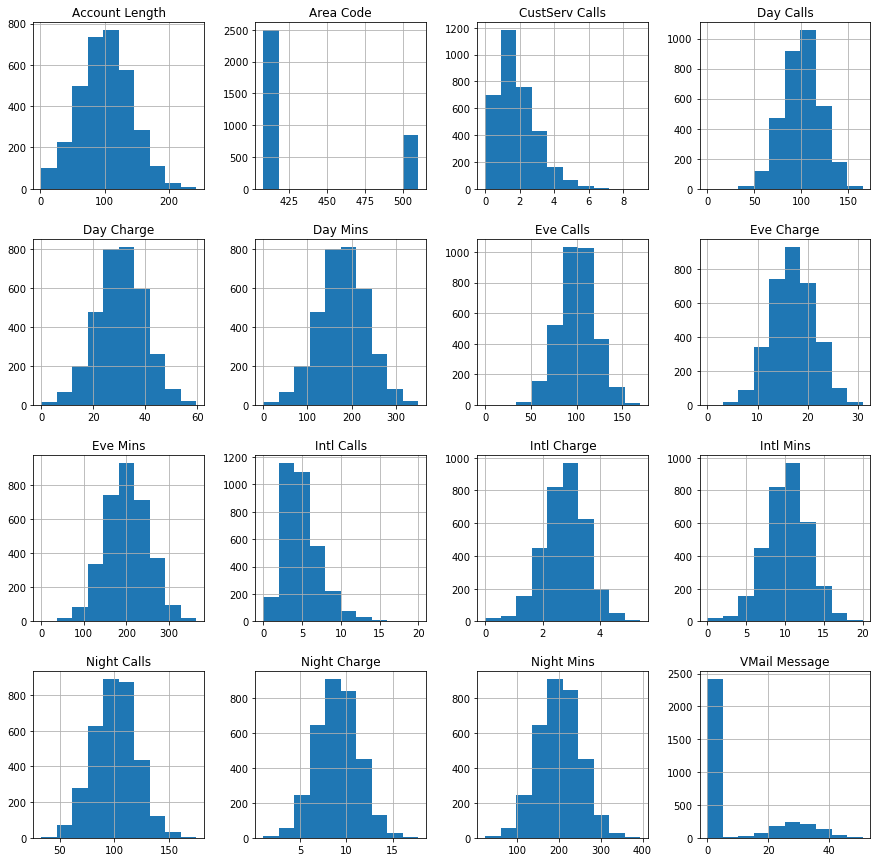

In [22]:
df.hist(figsize=(15,15))

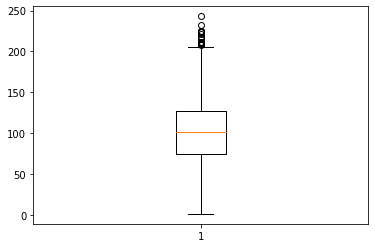

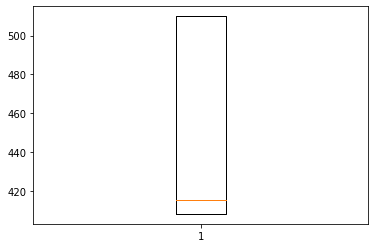

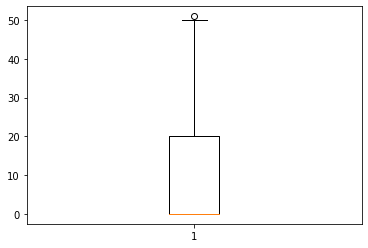

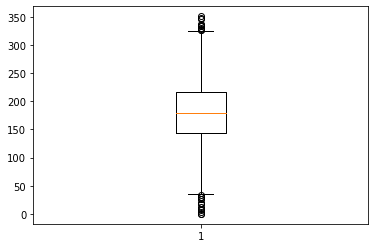

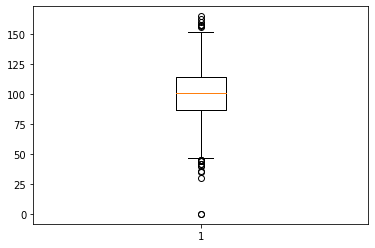

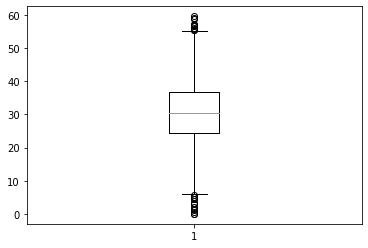

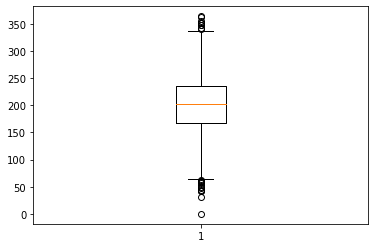

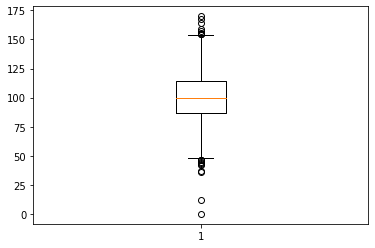

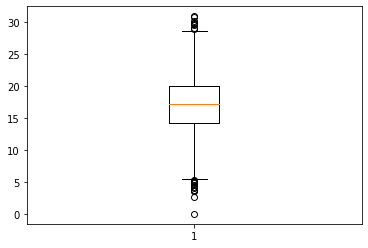

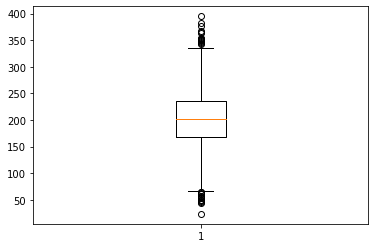

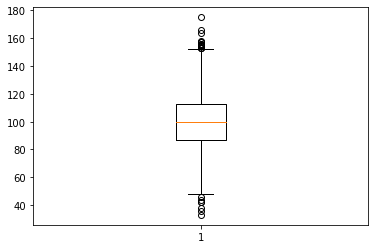

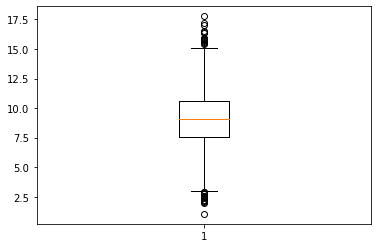

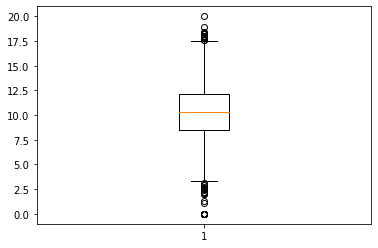

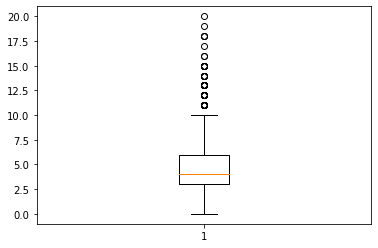

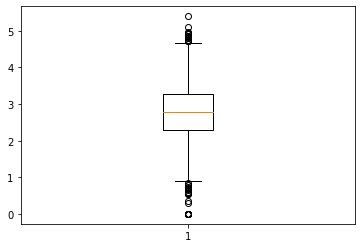

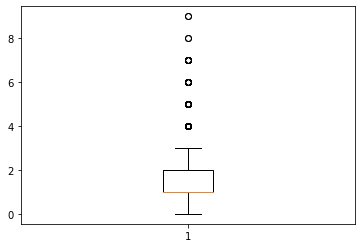

In [23]:
for i in df.columns:
    plt.boxplot(df['%s'%i])
    plt.show()
    

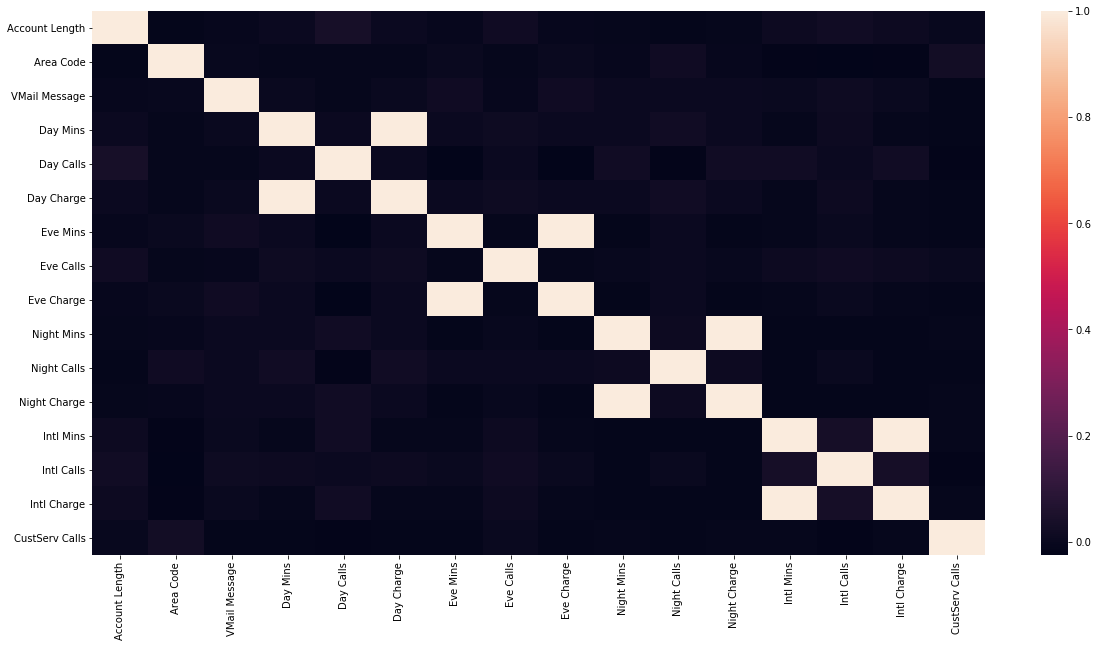

In [24]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

In [25]:
from sklearn.preprocessing import StandardScaler
df["Intl Plan"] = s1
df["VMail Plan"] = s2   

In [26]:
df.head()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Intl Plan,VMail Plan
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [27]:
scaler=StandardScaler()
X=np.array(df)
X=scaler.fit_transform(X)
X

array([[ 0.67648946, -0.52360328,  1.23488274, ..., -0.42793202,
        -0.32758048,  1.6170861 ],
       [ 0.14906505, -0.52360328,  1.30794844, ..., -0.42793202,
        -0.32758048,  1.6170861 ],
       [ 0.9025285 , -0.52360328, -0.59175986, ..., -1.1882185 ,
        -0.32758048, -0.61839626],
       ...,
       [-1.83505538,  1.71881732, -0.59175986, ...,  0.33235445,
        -0.32758048, -0.61839626],
       [ 2.08295458,  1.71881732, -0.59175986, ...,  0.33235445,
         3.05268496, -0.61839626],
       [-0.67974475, -0.52360328,  1.23488274, ..., -1.1882185 ,
        -0.32758048,  1.6170861 ]])

In [28]:
X[1]

array([ 0.14906505, -0.52360328,  1.30794844, -0.33373776,  1.12450284,
       -0.33401297, -0.10808036,  0.14486653, -0.10754944,  1.05857074,
        0.14782467,  1.05938994,  1.24048169, -0.60119509,  1.2411686 ,
       -0.42793202, -0.32758048,  1.6170861 ])

In [29]:
c = pd.DataFrame(X)
c.columns = df.columns

In [30]:
c.head(3)

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Intl Plan,VMail Plan
0,0.676489,-0.523603,1.234883,1.566767,0.476643,1.567036,-0.070610,-0.055940,-0.070427,0.866743,-0.465494,0.866029,-0.085008,-0.601195,-0.085690,-0.427932,-0.32758,1.617086
1,0.149065,-0.523603,1.307948,-0.333738,1.124503,-0.334013,-0.108080,0.144867,-0.107549,1.058571,0.147825,1.059390,1.240482,-0.601195,1.241169,-0.427932,-0.32758,1.617086
2,0.902529,-0.523603,-0.591760,1.168304,0.675985,1.168464,-1.573383,0.496279,-1.573900,-0.756869,0.198935,-0.755571,0.703121,0.211534,0.697156,-1.188218,-0.32758,-0.618396


In [31]:
c1 = c[1:5]
target = s3
target1 = target[1:5]
target1

1    0
2    0
3    0
4    0
Name: Churn?, dtype: int64

# Logistic Regression Model

Feature: 0, Score: 0.00728
Feature: 1, Score: -0.07328
Feature: 2, Score: 0.56969
Feature: 3, Score: 0.35029
Feature: 4, Score: -0.00433
Feature: 5, Score: 0.35147
Feature: 6, Score: 0.20380
Feature: 7, Score: 0.08957
Feature: 8, Score: 0.20734
Feature: 9, Score: 0.09977
Feature: 10, Score: 0.03481
Feature: 11, Score: 0.07401
Feature: 12, Score: 0.09569
Feature: 13, Score: -0.19024
Feature: 14, Score: 0.13269
Feature: 15, Score: 0.67669
Feature: 16, Score: 0.62493
Feature: 17, Score: -0.93355


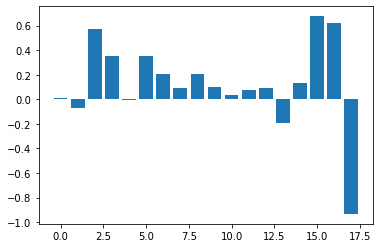

In [44]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
     

In [83]:
# Test the data using Logistic regression model
y_predict = model_lr.predict(X_test)
confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))
accuracy_score(y_test,y_predict)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       941
           1       0.55      0.19      0.28       159

    accuracy                           0.86      1100
   macro avg       0.71      0.58      0.60      1100
weighted avg       0.83      0.86      0.83      1100



0.86

####  Logistic Regression Observation: Got great accuracy - 86% but poor recall for to predict churners 18% -it is not at all good solution
1 represents churners .
means it can only predict not churner as churner but not fit to predict actual churners as churners
Important features given by Logistic Regression -
'CustServ Calls', 'Intl Plan','VMail Message','Day Mins','Day Charge'

# Apply Random Forest Model

#### Random Forest observation
WOW!!! looking great with accuracy i.e 95% 
but observed RECALL rate is 0.73.Here our focused metric is RECALL i.e churners should identify correxctly
Recall - Number of true positives divided by the total number
of elements that actually belong to the positive class
Try Hyper parameter tuning for improving RECALL

Have the target variable proportion as 85% : 15%
Try to improve minory minorty class praportion ...  

Feature: 0, Score: 0.03205
Feature: 1, Score: 0.00821
Feature: 2, Score: 0.02649
Feature: 3, Score: 0.12926
Feature: 4, Score: 0.03357
Feature: 5, Score: 0.13700
Feature: 6, Score: 0.06628
Feature: 7, Score: 0.03001
Feature: 8, Score: 0.06636
Feature: 9, Score: 0.03650
Feature: 10, Score: 0.03158
Feature: 11, Score: 0.03729
Feature: 12, Score: 0.04403
Feature: 13, Score: 0.05271
Feature: 14, Score: 0.04375
Feature: 15, Score: 0.12087
Feature: 16, Score: 0.08740
Feature: 17, Score: 0.01663


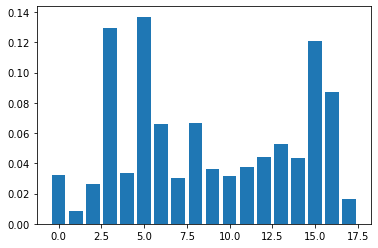

In [70]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
X,X_test,y,y_test = train_test_split(c,target,test_size = 0.33)
model_RF = RandomForestClassifier()
# fit the model
model_RF.fit(X, y)
# get importance
importance = model_RF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [85]:
pred_RF = model_RF.predict(X_test)
print(classification_report(pred_RF,y_test))

from sklearn.metrics import accuracy_score
accuracy_score(pred_RF,y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97       986
           1       0.70      0.98      0.82       114

    accuracy                           0.96      1100
   macro avg       0.85      0.97      0.90      1100
weighted avg       0.97      0.96      0.96      1100



0.9554545454545454

#### Random Forest Classifier : Good Recall :)
RF have accuracy of 95% and got great recall-98% to predict churners(i.e class-1)
'Day Charge','Day Mins', 'CustServ Calls','Intl Plan','Eve Mins','Eve Charge' are important features according to RandomForest

# XGBoost Feature Importance

0.82


You should consider upgrading via the 'c:\users\asha.ponnada\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Feature: 0, Score: 0.02345
Feature: 1, Score: 0.03517
Feature: 2, Score: 0.11005
Feature: 3, Score: 0.13765
Feature: 4, Score: 0.02520
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.10999
Feature: 7, Score: 0.02045
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.04502
Feature: 10, Score: 0.02816
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.04710
Feature: 13, Score: 0.06082
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.17894
Feature: 16, Score: 0.17800
Feature: 17, Score: 0.00000


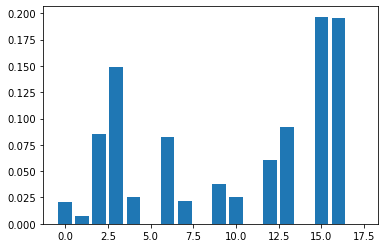

In [97]:
!pip install xgboost
# check xgboost version
import xgboost
print(xgboost.__version__)

# xgboost for feature importance on a classification problem
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
from matplotlib import pyplot
# define dataset
X,X_test,y,y_test = train_test_split(c,target,test_size = 0.33)
# define the model
model_XG = XGBClassifier()
# fit the model
model_XG.fit(X, y)
# get importance
importance_XG = model_XG.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance_XG))], importance_XG)
pyplot.show()

In [99]:
pred_RF = model_XG.predict(X_test)
print(classification_report(pred_RF,y_test))

from sklearn.metrics import accuracy_score
accuracy_score(pred_RF,y_test)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       987
           1       0.72      0.95      0.82       113

    accuracy                           0.96      1100
   macro avg       0.86      0.95      0.90      1100
weighted avg       0.97      0.96      0.96      1100



0.9563636363636364

# Results : RandomForest classifier improved "RECALL" well by comparing 
"LogisticRegression Classifier" , "RandomForest Classifier", "XGBoost Classifier"
Let's try SMOTING and other techniques ... later. 
Now, the Majority class praportion is 85% and 
Minority class proportion is 15%